In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

#loading the housing dataset 
housing = fetch_california_housing(as_frame=True) #loads directly into the pandas df

#to know the keys 
print("Keys in Housing data : ",housing.keys())

Keys in Housing data :  dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [7]:
df =housing.frame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())
print("-" * 20)
print("\nFull dataset information (df.info()):")
df.info()
print("-" * 20)
print("\nDescriptive Statistics (df.describe()):")
print(df.describe())
print("-" * 20)
print("\nDescription of the dataset (housing.DESCR):")
print(housing.DESCR)


First 5 rows of the DataFrame:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
--------------------

Full dataset information (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   Av

In [8]:
y = df['MedHouseVal'] #y target ( to predict the house price)


#remaining all are features 
X = df.drop('MedHouseVal', axis=1) #axis = 1 to drop the column

print("Shape of X : ")
print(X.shape)
print("Shape of Y : ")
print(y.shape)

print("\nFeatures (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())


Shape of X : 
(20640, 8)
Shape of Y : 
(20640,)

Features (X) head:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (y) head:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [9]:
from sklearn.model_selection import train_test_split
#splitting the data into training and testing data with 80/20 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nX_train (first 5 rows):")
print(X_train.head())
print("\ny_train (first 5 rows):")
print(y_train.head())


Shape of X_train: (16512, 8)
Shape of X_test: (4128, 8)
Shape of y_train: (16512,)
Shape of y_test: (4128,)

X_train (first 5 rows):
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   

       Longitude  
14196    -117.03  
8267     -118.16  
17445    -120.48  
14265    -117.11  
2271     -119.80  

y_train (first 5 rows):
14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64


In [10]:
#choosing a model 

from sklearn.linear_model import LinearRegression

model = LinearRegression()

print("Model : ",model)

Model :  LinearRegression()


In [11]:
#train the model by using the training data 
model.fit(X_train , y_train )

print("Model training complete!")

print("\nModel Coefficients (weights for each feature):")

#order of coefficeints corresponds to the order of trained data 

for feature , model_coeff in zip(X_train , model.coef_):
    print(f"{feature}:{model_coeff:.4f}")

print(f"\nModel Intercept (b0): {model.intercept_:.4f}")#it's a rare case where when all feature values are zero

#y = b0 + b1x1 + b2x2 + ....+bnxn 

Model training complete!

Model Coefficients (weights for each feature):
MedInc:0.4487
HouseAge:0.0097
AveRooms:-0.1233
AveBedrms:0.7831
Population:-0.0000
AveOccup:-0.0035
Latitude:-0.4198
Longitude:-0.4337

Model Intercept (b0): -37.0233


In [12]:
#now predict the train model by using test 

y_pred = model.predict(X_test)

print("First Five data in train model : " )
print(y_test.head())


print("First Five data in test model : " )
print(y_pred[:5])



First Five data in train model : 
20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64
First Five data in test model : 
[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test , y_pred )
print(f"Mean Squared Error : {mse:.4f}")


rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:.4f}")

r2 = r2_score(y_test,y_pred)
print(f"R - Square : {r2:.4f}")


# Interpretation of RMSE and R2 for this dataset
# Remember, MedHouseVal is in $100,000s
print("\n--- Interpretation ---")
print(f"On average, our model's predictions are off by roughly ${rmse * 100000:.2f}.")
print(f"The R-squared value of {r2:.4f} means that approximately {r2*100:.2f}% of the variance in house prices can be explained by our model's features.")
print("A higher R-squared (closer to 1) and lower RMSE are generally better.")

Mean Squared Error : 0.5559
Root Mean Squared Error : 0.7456
R - Square : 0.5758

--- Interpretation ---
On average, our model's predictions are off by roughly $74558.14.
The R-squared value of 0.5758 means that approximately 57.58% of the variance in house prices can be explained by our model's features.
A higher R-squared (closer to 1) and lower RMSE are generally better.


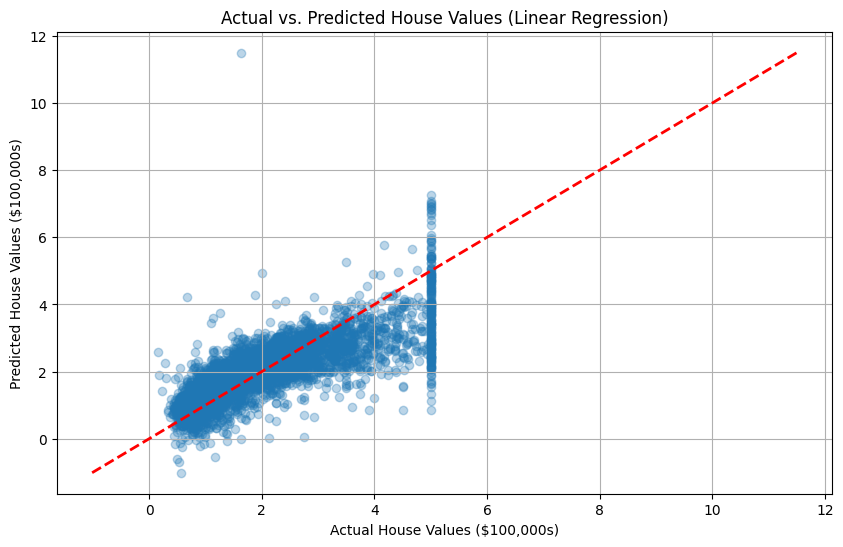

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3) # alpha makes points transparent to see density

# Define the range for the ideal line based on the min/max of BOTH actual and predicted values
# This ensures the line spans the entire relevant area of your plot
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2) # Ideal line

plt.xlabel("Actual House Values ($100,000s)")
plt.ylabel("Predicted House Values ($100,000s)")
plt.title("Actual vs. Predicted House Values (Linear Regression)")
plt.grid(True)
plt.show()